# The Magic 8-ball


### Learning Outcomes
<li> Explain the role of oracles in quantum algorithms

<li> Express the action of an oracle as a unitary matrix applied to computational basis states.

Author: [Monit Sharma](https://github.com/MonitSharma)
LinkedIn: [Monit Sharma](https://www.linkedin.com/in/monitsharma/)
Twitter: [@MonitSharma1729](https://twitter.com/MonitSharma1729)
Medium : [MonitSharma](https://medium.com/@_monitsharma)

Let's think a bit more about how this lock breaking actually works. Call the correct combination for an $n$ bit lock $s \in \{0,1\}^n$. We can model the lock as a function $f$ from $n$ bit strings $x \in \{0,1\}^n$ to a bit $y \in \{0,1\}$ with $f(x) =0$ meaning **the combination doesn't work**. More concisely

$$ f(x) = 1 \ \ \ (x = s) $$

$$ f(x) = 0 \ \ \ \text{ otherwise } $$


------


We'll assume that the $f$  is a black box that the computer (quantum or classical) cannot look inside. However, the computer can ask the if a combination is correct, and get a "yes" or "no" answer immediately. In computer science, such a black box is called an **oracle**, since its inner workings appear mysterious. You can think of it as a magic 8-ball. You shake it and an answer emerges from the shadowy depths. The act of shaking it and letting the answer emerge is called a **query**.


![](https://codebook.xanadu.ai/pics/oracle-lock.svg)


The classical brute-force algorithm for breaking a lock is simple. We simply comb through the $ x \in  \{0,1\}^n$ in whatever order we like, asking the oracle to compute $f(x)$ until we arrive at $f(x) = 1$ . We then declare $x=s$  as the solution.


------

**What about the Quantum Case?**
 Here, we need to be careful about what the oracle is doing, since only *unitary* operations are allowed. A clever choice is to put the oracle's answer into a phase

 $$ |x⟩ → (-1)^{f(x)}|x⟩$$

 We encode this as a unitary operator $U_f$, which acts on basis states.


 

### Codercise A.2.1

Write a function which returns the oracle in matrix form for a given secret combination.

In [1]:
%pip install pennylane
import pennylane as qml
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 55.9 MB/s eta 0:00:00


In [2]:
def oracle_matrix(combo):
    """Return the oracle matrix for a secret combination.
    
    Args:
        combo (list[int]): A list of bits representing a secret combination.
         
    Returns: 
        array[float]: The matrix representation of the oracle.
    """
    index = np.ravel_multi_index(combo, [2]*len(combo)) # Index of solution
    my_array = np.identity(2**len(combo)) # Create the identity matrix

    ##################
    # YOUR CODE HERE #
    ##################
    test = np.zeros(shape=(2**len(combo)))
    test[index] = 1
    my_array = my_array- 2 *np.outer(test,test)
    # MODIFY DIAGONAL ENTRY CORRESPONDING TO SOLUTION INDEX
    

    return my_array


In [4]:
combo =[1 ,0 ,0]
oracle_matrix(combo)

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

Let's add the oracle to our circuit and see if we fare better than just creating the uniform superposition. Here is the circuit we want to implement:

![](https://codebook.xanadu.ai/pics/uniform-oracle.svg)

### Codercise A.2.2

Write a circuit which applies the oracle to the uniform superposition. The oracle matrix function from the previous exercise is available for you as `oracle_matrix`. The supplied code will plot the resulting probability distribution. Has applying the oracle helped us break the lock?

In [5]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def oracle_circuit(combo):
    """Create a uniform superposition, apply the oracle, and return probabilities.
    
    Args:
        combo (list[int]): A list of bits representing a secret combination.

    Returns:
        list[float]: The output probabilities.
    """
    for _ in range(n_bits):
        qml.Hadamard(wires=_)
        
    qml.QubitUnitary(oracle_matrix(combo), wires=[i for i in range(n_bits)])

    ##################
    # YOUR CODE HERE #
    ##################

    return qml.probs(wires=range(n_bits))


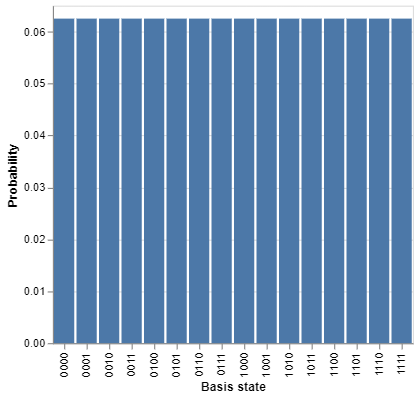